In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("C:/Users/RESHMA KEESARI/Downloads/archive (3)/Mall_Customers.csv")

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

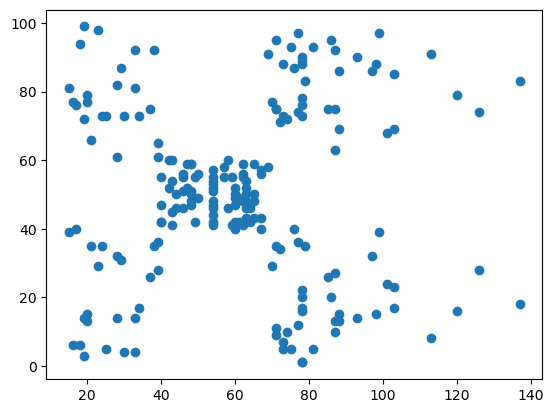

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [ ]:
krange = range(1,9)
sse=[]
for k in krange:
    model1= KMeans(n_clusters=k)
    model1.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(model1.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [ ]:
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25022.48500453035]

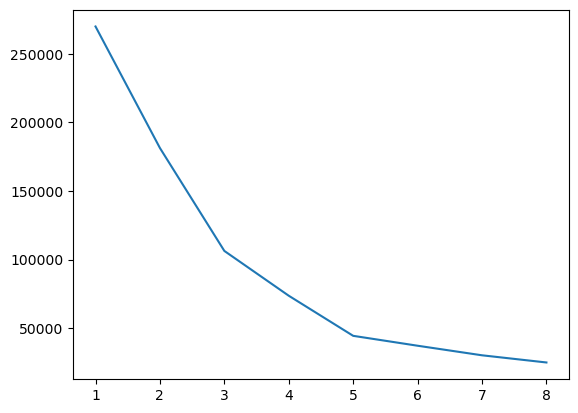

In [ ]:
plt.plot(krange, sse)

In [ ]:
scaler= MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)']=scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score 1-100)']=scaler.transform(df[['Spending Score (1-100)']])

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Score 1-100)
0,1,Male,19,0.000000,39,0.387755
1,2,Male,21,0.000000,81,0.816327
2,3,Female,20,0.008197,6,0.051020
3,4,Female,23,0.008197,77,0.775510
4,5,Female,31,0.016393,40,0.397959
...,...,...,...,...,...,...
195,196,Female,35,0.860656,79,0.795918
196,197,Female,45,0.909836,28,0.275510
197,198,Male,32,0.909836,74,0.744898
198,199,Male,32,1.000000,18,0.173469


In [ ]:
model1= KMeans(n_clusters=5)
model1.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
y = model1.predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [ ]:
y

array([0, 1, 4, 1, 0, 1, 4, 3, 4, 1, 4, 3, 4, 1, 4, 1, 0, 1, 0, 3, 0, 1,
       4, 1, 4, 1, 0, 2, 0, 3, 4, 1, 4, 3, 4, 1, 4, 1, 0, 1, 0, 3, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 3, 0, 1, 0, 3, 4, 1, 4, 1,
       0, 1, 4, 3, 4, 1, 4, 1, 4, 3, 0, 3, 4, 3, 0, 1, 4, 3, 4, 3, 4, 1,
       4, 3, 4, 1, 4, 1, 0, 3, 4, 3, 0, 1, 4, 3, 0, 2, 4, 1, 4, 3, 4, 3,
       4, 1, 4, 3, 0, 3, 4, 3, 0, 3, 4, 1, 4, 3, 4, 1, 4, 3, 4, 1, 0, 1,
       4, 3])

In [ ]:
model1.cluster_centers_

array([[ 0.34282787, 37.        ],
       [ 0.34579918, 74.25      ],
       [ 0.32006875, 52.79032258],
       [ 0.48299939, 90.7037037 ],
       [ 0.43652795, 11.84615385]])

In [ ]:
df['New_Cluster']=y

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Score 1-100),New_Cluster
0,1,Male,19,0.000000,39,0.387755,0
1,2,Male,21,0.000000,81,0.816327,1
2,3,Female,20,0.008197,6,0.051020,4
3,4,Female,23,0.008197,77,0.775510,1
4,5,Female,31,0.016393,40,0.397959,0
...,...,...,...,...,...,...,...
195,196,Female,35,0.860656,79,0.795918,1
196,197,Female,45,0.909836,28,0.275510,0
197,198,Male,32,0.909836,74,0.744898,1
198,199,Male,32,1.000000,18,0.173469,4


In [ ]:
df1=df[df.New_Cluster==0]
df2=df[df.New_Cluster==1]
df3=df[df.New_Cluster==2]
df4=df[df.New_Cluster==4]
df5=df[df.New_Cluster==5]

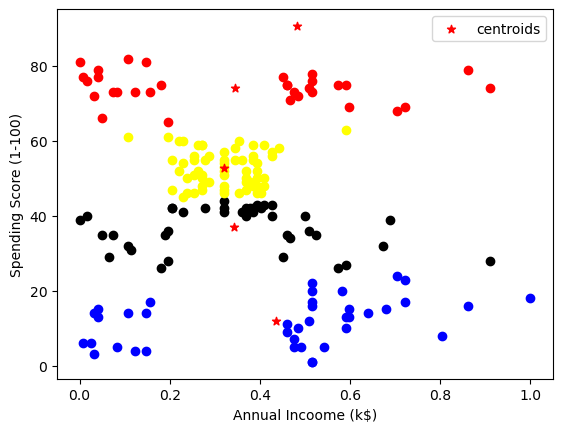

In [ ]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'], color ="black")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'], color ="red")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'], color ="yellow")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'], color ="blue")
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'], color ="gray")
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,1], color="red", marker="*",label="centroids")
plt.xlabel('Annual Incoome (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()